We're going to work with one of the examples from Chollet in this lab.  In this example, our goal is to use text movie reviews from IMDB (the Internet Move DataBase) as input, and our goal will be to classify the reviews as either "positive" or "negative".

I have taken all of the code below to preprocess the data and fit a model in Keras straight out of Chapter 4 of Chollet.  The book describes how the code works in some detail, so I encourage you to give it a read.

### Import modules

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import imdb
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import numpy as np
import math

### Load data and preprocess it
This will take a few seconds to run; it downloads a large data set.

We print out a "decoded" review to see what they look like.  But the reviews themselves are one-hot encoded (see next code cell)

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
print("x_train shape = " + str(x_train.shape))
print("y_train shape = " + str(y_train.shape))
print("The first review: " + decoded_review)
print("The first review encoded as 1's and 0's for presence/absence of each of the 10000 most commonly occurring words.")
print(x_train[0, :]) # currently, x_train has observations in rows; this prints the 

x_train shape = (25000, 10000)
y_train shape = (25000,)
The first review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these childr

### Define Keras model and fit it

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Split into train and validation sets, fit the model.

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.5412 - acc: 0.7746 - val_loss: 0.4058 - val_acc: 0.8674
Epoch 2/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.3255 - acc: 0.8984 - val_loss: 0.3142 - val_acc: 0.8873
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2357 - acc: 0.9219 - val_loss: 0.2836 - val_acc: 0.8911
Epoch 4/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1846 - acc: 0.9390 - val_loss: 0.2741 - val_acc: 0.8903
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1459 - acc: 0.9534 - val_loss: 0.2807 - val_acc: 0.8894
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1241 - acc: 0.9618 - val_loss: 0.2891 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.0969 - acc: 0.9729 - val_loss: 0.3076 - 

### Plot training and validation set loss and accuracy over the course of model estimation.

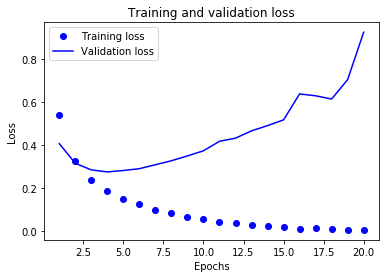

In [25]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

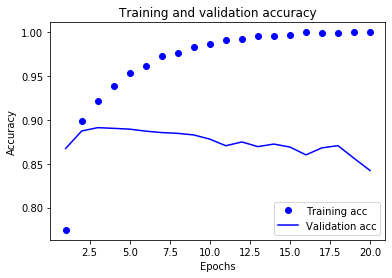

In [26]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Get test set performance

In [27]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 84us/step


[0.9550511651921272, 0.83152]

### Transpose/reshape data so that it's shaped the way our manual implementation expects.

In [0]:
x_train = x_train.T
y_train = y_train.reshape(1, y_train.shape[0])
partial_x_train = partial_x_train.T
partial_y_train = partial_y_train.reshape(1, partial_y_train.shape[0])
x_val = x_val.T
y_val = y_val.reshape(1, y_val.shape[0])
x_test = x_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [29]:
print(x_train.shape)
print(y_train.shape)
print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 25000)
(1, 25000)
(10000, 15000)
(1, 15000)
(10000, 10000)
(1, 10000)
(10000, 25000)
(1, 25000)


### Time for you to do stuff!

We're going to code this model up from scratch.  We will implement 5 functions:
1. `initialize_params` will generate random starting values for the parameters b and w.
2. `forward_prop` does the calculations for forward propagation.
3. `backward_prop` does the calculations for backward propagation.
4. `grad_check` does gradient checking so that we can be sure our backward propagation is correct.  I've written this one.
5. `fit_model` does gradient descent to estimate the model parameters.

Note that as defined above, our network has 3 layers:
 * Layer 1 has 16 units and a relu activation
 * Layer 2 has 16 units and a relu activation
 * Layer 3 has 1 unit and a sigmoid activation

### 1. initialize_params

Add the appropriate shape specifications to the initializations below.

**Note that you are defining $w$, not $w^T$**

In [0]:
def initialize_params(num_features, seed = 9433):
  '''
  Initialize parameter values for a network with 3 layers:
  layer 1 has 16 units, layer 2 has 16 units, and layer 3 has 1 unit

  Arguments:
    - num_features: number of input features
    - seed: seed to use for random number generation
  
  Return:
    - Dictionary with initial values for b1, w1, b2, w2, b3, and w3
  '''
  # set seed
  np.random.seed(seed)

  # layer 1 parameters -- replace Nones with appropriate shape
  b1 = np.random.standard_normal((16, 1)) * 0.1 
  w1 = np.random.standard_normal((num_features, 16)) * 0.1

  # layer 2 parameters -- replace Nones with appropriate shape
  b2 = np.random.standard_normal((16, 1)) * 0.1
  w2 = np.random.standard_normal((16, 16)) * 0.1

  # layer 3 parameters -- replace Nones with appropriate shape
  b3 = np.random.standard_normal((1, 1)) * 0.1
  w3 = np.random.standard_normal((16, 1)) * 0.1

  return({
      'b1': b1,
      'w1': w1,
      'b2': b2,
      'w2': w2,
      'b3': b3,
      'w3': w3
  })

### 2. forward_prop

In [0]:
def forward_prop(params, x):
  '''
  Forward propagation calculations

  Arguments:
    - params: dictionary with values for b1, w1, b2, w2, b3, w3
    - x: matrix of features, shape (p, m)
  
  Return:
    - Dictionary with z and a values for each layer
  '''
  # Pull out parameters from params dictionary
  b1 = params['b1']
  w1 = params['w1']
  b2 = params['b2']
  w2 = params['w2']
  b3 = params['b3']
  w3 = params['w3']
  
  # Calculate forward propagation
  # You can use np.maximum(0, ___) to compute the relu activation function
  # We have imported the sigmoid function
  z1 = b1 + np.dot(w1.T, x)
  a1 = np.maximum(0, z1)

  z2 = b2 + np.dot(w2.T, a1)
  a2 = np.maximum(0, z2)

  z3 = b3 + np.dot(w3.T, a2)
  a3 = sigmoid(z3)
  
  # Return dictionary of results from forward propagation
  return({
    'z1': z1,
    'a1': a1,
    'z2': z2,
    'a2': a2,
    'z3': z3,
    'a3': a3
  })

### 3. backward_prop

In [0]:
def backward_prop(params, x, y, forward_cache):
  '''
  Backward propagation calculations

  Arguments:
    - params: dictionary with values for b1, w1, b2, w2, b3, w3
    - x: array of features, shape (p, m)
    - y: array of responses, shape (1, m)
    - forward_cache: Dictionary with z and a values for each layer
      (return value from forward_prop)
  
  Return:
    - Dictionary of derivatives of cost function J with respect to
      b1, w1, b2, w2, b3, w3
  '''
  # Extract quantities needed for backward propagation calculations
  m = x.shape[1]

  z1 = forward_cache['z1']
  a1 = forward_cache['a1']
  z2 = forward_cache['z2']
  a2 = forward_cache['a2']
  z3 = forward_cache['z3']
  a3 = forward_cache['a3']

  w1 = params['w1']
  w2 = params['w2']
  w3 = params['w3']

  # Backward propagation calculations
  # Layer 3
  dJdz3 = a3 - y
  dJdb3 = np.mean(dJdz3, axis = 1, keepdims=True)
  dJdw3 = (1/m) * np.dot(a2, dJdz3.T)

  # Layer 2
  dJda2 = np.dot(w3, dJdz3)
  dJdz2 = dJda2 * (z2 >= 0).astype(float)
  dJdb2 = np.mean(dJdz2, axis = 1, keepdims=True)
  dJdw2 = (1/m) * np.dot(a1, dJdz2.T)

  # Layer 1
  dJda1 = np.dot(w2, dJdz2)
  dJdz1 = dJda1 * (z1 >= 0).astype(float)
  dJdb1 = np.mean(dJdz1, axis = 1, keepdims=True)
  dJdw1 = (1/m) * np.dot(x, dJdz1.T)

  return({
      'dJdb1': dJdb1,
      'dJdw1': dJdw1,
      'dJdb2': dJdb2,
      'dJdw2': dJdw2,
      'dJdb3': dJdb3,
      'dJdw3': dJdw3
  })

### 4. grad_check
I have implemented this in the two functions below; you just need to run the code.  After the function definitions, there are calls to check the gradient for a bias parameter and a weight parameter in each of the 3 layers.  Your results should match to at least 6 or 7 decimal places.

Although I have implemented this, you should know how this works!

In [33]:
def loss(a3, y):
  '''
  Calculate the binary crossentropy loss

  Arguments:
    - a3: output from layer 3
    - y: observed responses
  
  Return:
    - binary cross entropy
  '''
  m = y.shape[1]
  inds_0 = np.where(y == 0)
  inds_1 = np.where(y == 1)

  return(-1 * (np.sum(np.log(a3[inds_1])) + np.sum(np.log(1 - a3[inds_0]))) / m)

def grad_check(param_name, ind1, ind2, eps = 0.000001):
  '''
  Calculate gradient check by finite differencing

  Arguments:
    - param_name: name of parameter to check, e.g. 'w1'
    - ind1, ind2: indices to check for the specified parameter
    - eps: amount to add and subtract from the given parameter value
  
  Returns:
    - No return value.  Prints diagnostic messages.
  '''
  params = initialize_params(num_features = x_train.shape[0])
  forward_cache = forward_prop(params, x_train)

  params[param_name][ind1, ind2] = params[param_name][ind1, ind2] + eps
  forward_cache_plus_eps = forward_prop(params, x_train)
  loss_plus_eps = loss(forward_cache_plus_eps['a3'], y_train)

  params[param_name][ind1, ind2] = params[param_name][ind1, ind2] - 2*eps
  forward_cache_minus_eps = forward_prop(params, x_train)
  loss_minus_eps = loss(forward_cache_minus_eps['a3'], y_train)

  est_grad = (loss_plus_eps - loss_minus_eps) / (2 * eps)
  calc_grad = backward_prop(params, x_train, y_train, forward_cache)

  print("\ncheck of dJd" + param_name + "[" + str(ind1) + ", " + str(ind2) + "]")
  print("estimated derivative = " + str(est_grad))
  print("calculated derivative = " + str(calc_grad['dJd' + param_name][ind1, ind2]))


grad_check('b3', 0, 0)
grad_check('w3', 1, 0)
grad_check('b2', 0, 0)
grad_check('w2', 1, 0)
grad_check('b1', 0, 0)
grad_check('w1', 1, 0)



check of dJdb3[0, 0]
estimated derivative = -0.06645035599550653
calculated derivative = -0.06645035592818394

check of dJdw3[1, 0]
estimated derivative = -0.01705180768807324
calculated derivative = -0.01705180760554546

check of dJdb2[0, 0]
estimated derivative = 4.741124159934884e-05
calculated derivative = 4.7411200549146216e-05

check of dJdw2[1, 0]
estimated derivative = -2.0967116931558394e-06
calculated derivative = -2.096640381475816e-06

check of dJdb1[0, 0]
estimated derivative = 0.002057349846040779
calculated derivative = 0.002057349875226606

check of dJdw1[1, 0]
estimated derivative = 0.002057349846040779
calculated derivative = 0.0020573498752266047


### 5. fit_model

In [0]:
def fit_model(
    x_train,
    y_train,
    num_epochs,
    learning_rate,
    initial_params):
  '''
  Fit our model by gradient descent.

  Arguments:
    - x_train: array of input features of shape (p, m)
    - y_train: array of responses of shape (1, m)
    - num_epochs: number of iterations of gradient descent to run
    - learning_rate: learning rate for gradient descent
    - initial_params: dictionary of starting parameter values
  
  Return:
    - Dictionary of parameter estimates b1, w1, b2, w2, b3, w3
  '''
  # Get initial parameter values
  params = initial_params

  # For loop should iterate over the number of epochs
  for i in range(num_epochs):
    # print progress update
    print("epoch " + str(i))

    # Do forward propagation
    forward_cache = forward_prop(params, x_train)

    # Calculate and print training set accuracy based on current parameter values
    train_set_accuracy = np.mean(y_train == (forward_cache['a3'] >= 0.5).astype(float))
    print("train set accuracy: " + str(train_set_accuracy))

    # Do backward propagation
    calc_grad = backward_prop(params, x_train, y_train, forward_cache)

    # Do parameter updates
    # I would probably ordinarily loop over the parameter names to do this, but
    # I think it will make more sense if you type things in by hand?
    # Your update for b1 should involve params['b1'], calc_grad['dJdb1'], and
    # the learning rate.
    params['b1'] = params['b1'] - learning_rate * calc_grad['dJdb1']
    params['w1'] = params['w1'] - learning_rate * calc_grad['dJdw1']
    params['b2'] = params['b2'] - learning_rate * calc_grad['dJdb2']
    params['w2'] = params['w2'] - learning_rate * calc_grad['dJdw2']
    params['b3'] = params['b3'] - learning_rate * calc_grad['dJdb3']
    params['w3'] = params['w3'] - learning_rate * calc_grad['dJdw3']
  
  # Return
  return(params)

Call the fit_model function.  To match what was done in the Keras code, you should use `partial_x_train` and `partial_y_train`.  To start, use 20 epochs and a learning rate of 0.1.

This should take a little under a minute to run.  Your results won't be that impressive; I got up to about 59% classification accuracy on the training set after 20 epochs.  The reason we're not doing as well as Keras is that we are using a less fancy optimization algorithm.  We'll see on Friday how to make a small adjustment to our optimization routine to get much faster convergence.  For now, you could increase the number of training epochs if you want to.

In [35]:
# generate starting values for the parameters
initial_params = initialize_params(num_features = partial_x_train.shape[0])

# estimate the parameters by calling your fit_model function
param_estimates = fit_model(
  partial_x_train,
  partial_y_train,
  num_epochs=20,
  learning_rate=0.5,
  initial_params = initial_params)

epoch 0
train set accuracy: 0.5035333333333334
epoch 1
train set accuracy: 0.5039333333333333
epoch 2
train set accuracy: 0.5062666666666666
epoch 3
train set accuracy: 0.5177333333333334
epoch 4
train set accuracy: 0.531
epoch 5
train set accuracy: 0.5392
epoch 6
train set accuracy: 0.5456
epoch 7
train set accuracy: 0.5500666666666667
epoch 8
train set accuracy: 0.5569333333333333
epoch 9
train set accuracy: 0.5603333333333333
epoch 10
train set accuracy: 0.5612666666666667
epoch 11
train set accuracy: 0.5640666666666667
epoch 12
train set accuracy: 0.5672666666666667
epoch 13
train set accuracy: 0.5706666666666667
epoch 14
train set accuracy: 0.5734666666666667
epoch 15
train set accuracy: 0.5761333333333334
epoch 16
train set accuracy: 0.5792
epoch 17
train set accuracy: 0.5812666666666667
epoch 18
train set accuracy: 0.5845333333333333
epoch 19
train set accuracy: 0.5874666666666667


### Get test set performance based on your parameter estimates

In [36]:
test_forward = forward_prop(param_estimates, x_test)
y_test_hat = (test_forward['a3'] >= 0.5).astype(float)
np.mean(y_test_hat == y_test)

0.58624

### Estimation by Stochastic Gradient Descent

**We will talk about this on Friday!  Do not do this on Wednesday.**

Implement a function to do stochastic gradient descent:

In [0]:
def fit_model_SGD(
    x_train,
    y_train,
    num_epochs,
    minibatch_size,
    learning_rate,
    initial_params):
  '''
  Estimate model parameters by stochastic gradient descent (SGD)

  Arguments:
    - x_train: array of input features of shape (p, m)
    - y_train: array of responses of shape (1, m)
    - num_epochs: number of iterations of gradient descent to run
    - minibatch_size: number of observations in each minibatch
    - learning_rate: learning rate for gradient descent
    - initial_params: dictionary of starting parameter values
  
  Return:
    - Dictionary of parameter estimates b1, w1, b2, w2, b3, w3
  '''
  params = initial_params

  # calculate size of each minibatch
  m = x_train.shape[1]
  num_minibatches = math.ceil(m / minibatch_size)

  # for loop over the number of epochs
  for i in range(num_epochs):
    print("epoch " + str(i))
    # find and print training set accuracy.  Kindof a waste of time, but nice to see.
    forward_cache = forward_prop(params, x_train)
    train_set_accuracy = np.mean(y_train == (forward_cache['a3'] >= 0.5).astype(float))
    print("train set accuracy: " + str(train_set_accuracy))

    # for loop over minibatches within the current epoch
    for j in range(num_minibatches):
      # print progress indicator.  end = "" makes it so there is not a new line
      # after each print statement
      print(".", end = "")

      # Set up a slice for the observation indices in the current minibatch
      # The formula for the endpoint of the batch will potentially be different
      # depending on whether you're in the last minibatch or not.
      end_ind = (j+1)*minibatch_size
      if j == num_minibatches - 1:
        # last batch -- don't try to use more observations than we have
        end_ind = m
      
      # pull out the x and y observations for this minibatch
      x_train_minibatch = x_train[:, j*minibatch_size:end_ind]
      y_train_minibatch = y_train[:, j*minibatch_size:end_ind]

      # forward propagation based on this minibatch
      forward_cache = forward_prop(params, x_train_minibatch)

      # backward propagation based on this minibatch
      calc_grad = backward_prop(params, x_train_minibatch, y_train_minibatch, forward_cache)

      # gradient descent updates based on this minibatch
      params['b1'] = params['b1'] - learning_rate * calc_grad['dJdb1']
      params['w1'] = params['w1'] - learning_rate * calc_grad['dJdw1']
      params['b2'] = params['b2'] - learning_rate * calc_grad['dJdb2']
      params['w2'] = params['w2'] - learning_rate * calc_grad['dJdw2']
      params['b3'] = params['b3'] - learning_rate * calc_grad['dJdb3']
      params['w3'] = params['w3'] - learning_rate * calc_grad['dJdw3']
  
  # return parameters estimates
  return(params)

Now you can call the `fit_model_SGD` function to do stochastic gradient descent for our data set using 20 epochs, a minibatch size of 512 observations, and a learning rate of 0.1.  You should see much faster convergence!

In [38]:
# generate starting values for the parameters
initial_params = initialize_params(num_features = partial_x_train.shape[0])

# do estimation
params_fit_mb = fit_model_SGD(
  partial_x_train,
  partial_y_train,
  num_epochs=20,
  minibatch_size=512,
  learning_rate=0.1,
  initial_params = initial_params)

epoch 0
train set accuracy: 0.5035333333333334
..............................epoch 1
train set accuracy: 0.5432666666666667
..............................epoch 2
train set accuracy: 0.5676666666666667
..............................epoch 3
train set accuracy: 0.5846666666666667
..............................epoch 4
train set accuracy: 0.6043333333333333
..............................epoch 5
train set accuracy: 0.6289333333333333
..............................epoch 6
train set accuracy: 0.6589333333333334
..............................epoch 7
train set accuracy: 0.6868
..............................epoch 8
train set accuracy: 0.7167333333333333
..............................epoch 9
train set accuracy: 0.7416666666666667
..............................epoch 10
train set accuracy: 0.765
..............................epoch 11
train set accuracy: 0.7796666666666666
..............................epoch 12
train set accuracy: 0.7941333333333334
..............................epoch 13
train set ac

In [39]:
test_forward = forward_prop(params_fit_mb, x_test)
y_test_hat = (test_forward['a3'] >= 0.5).astype(float)
np.mean(y_test_hat == y_test)

0.8262